# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [490]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [637]:
# Import du dataframe "data.csv"
df = pd.read_csv('data.csv')
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [613]:
df.describe()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
count,9565,9563,9582,9582,9488,9582
unique,1382,4,57,4,21,14
top,Ball Aerospace,Data scientist,SQL/R/Python//Big data,Master,"1,5",Paris
freq,748,3865,539,4971,1023,2015


### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [493]:
df['Experience'] = df['Experience'].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x).astype(float)

In [494]:
for job in df['Metier'].unique():
    # to filter out na value
    if job == job:
        filling_val = 0
        if 'scientist' in job:
            filling_val = df[df['Metier'] == job]['Experience'].dropna().median()
        else:
            filling_val = df[df['Metier'] == job]['Experience'].dropna().mean()
        df[df['Metier'] == job] = df[df['Metier'] == job].fillna({'Experience':filling_val})

### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [495]:
for job in df['Metier'].unique():
    if job == job:
        mean_xp = df[df['Metier'] == job]['Experience'].dropna().mean()
        print("Le %s a en moyenne %0.2f années d'expériences." % (job, mean_xp))

Le Data scientist a en moyenne 2.24 années d'expériences.
Le Data architecte a en moyenne 3.00 années d'expériences.
Le Lead data scientist a en moyenne 3.96 années d'expériences.
Le Data engineer a en moyenne 2.98 années d'expériences.


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

<AxesSubplot:xlabel='Metier', ylabel='Experience'>

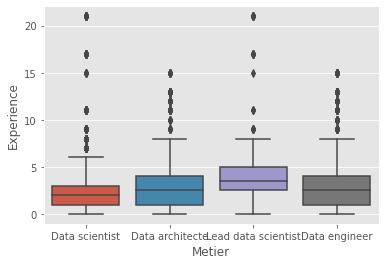

In [496]:
sb.boxplot(x='Metier', y='Experience', data=df)

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

In [497]:
df.describe()

,Experience
count,9582.000000
mean,2.813631
std,2.703543
min,0.000000
25%,1.000000
50%,2.000000
75%,3.500000
max,21.000000


<AxesSubplot:xlabel='Experience', ylabel='Count'>

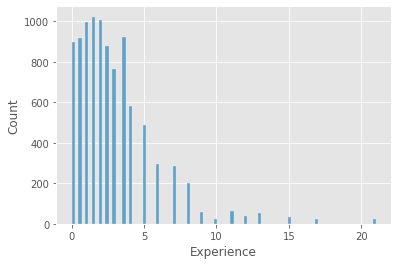

In [498]:
sb.histplot(df['Experience'])

In [499]:
def xp_label(xp):
    if xp < 1:
        return 'débutant'
    elif xp < 3:
        return 'confirmé'
    elif xp < 5:
        return 'avancé'
    return 'expert'

df['Exp_label'] = df['Experience'].apply(xp_label)

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

In [500]:
# For the same techs some start with upper case
# and some don't (eg 'Python' & 'python')
df['Technologies'] = df['Technologies'].apply(str.lower)

In [501]:
technologies_counter = dict()
for technologies in df['Technologies'].values:
    for techno in technologies.split('/'):
        if not techno:
            # Sometimes we have tech1//tech2
            continue
        if technologies_counter:
            if techno in technologies_counter.keys():
                technologies_counter[techno][0] += 1
            else:
                technologies_counter[techno] = [1]
        else:
            technologies_counter[techno] = [1]

Top 5 technologies used:
python: Used by 69.16% of professionals
r: Used by 45.65% of professionals
sql: Used by 26.94% of professionals
java: Used by 17.94% of professionals
hadoop: Used by 16.58% of professionals


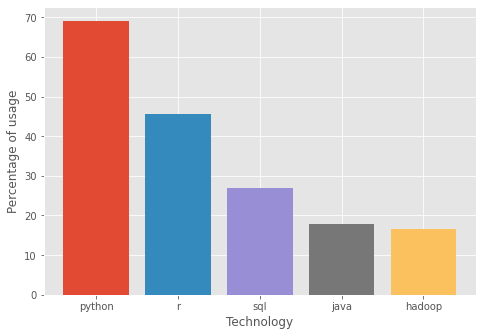

In [502]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print('Top 5 technologies used:')
for techno, occurences in sorted(technologies_counter.items(), key=lambda x: x[1], reverse=True)[:5]:
    ax.bar(techno, occurences[0]*100/len(df))
    print('%s: Used by %0.2f%% of professionals' % (techno, occurences[0]*100/len(df)))
plt.xlabel('Technology')
plt.ylabel('Percentage of usage')
plt.show()

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [628]:
REGEXS = {
    r'(research|lab|institute|university|sciences|college)':'research', 
    r'(hospital|cancer|medical|health)':'medical',
    r'(amazon|apple|facebook|google|netflix|microsoft)':'tech',
    r'(financ|mckinsey|jp morgan)':'finance',
}

In [632]:
def company_type(company):
    if company == company:
        company = company.lower()
        for r in enumerate(REGEXS):
            if re.search(r, company):
                return REGEXS[r]
    return 'generic'

In [634]:
df['Type entreprise'] = df['Entreprise'].map(company_type)

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  